In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.io import ascii
import numpy as np
from astropy.io import fits

SMALL_SIZE = 8
MEDIUM_SIZE = 9
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)

# import matplotlib.font_manager
# matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
# sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
plt.rc('font', family='Times New Roman')

plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
# matplotlib.pyplot.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')
import seaborn as sns
sns.set_palette("Set1")

## Extracting Outputs and saving simulation correlation functions
for full, spiral and elliptical catalogues 

In [71]:
wdp_x = []
wdx_x = []
for i in range(0,1000):
    for j, f in enumerate((f'OUTPUT_CAMELS_DM_LH_x/wgp_LH{i}.dat',f'OUTPUT_CAMELS_DM_LH_x/wgg_LH{i}.dat')):
        dat = ascii.read(f)
        if j == 0:
#             print(dat.colnames)
#             print(dat['meanr'])
            r, wgp, wgx = dat['rnom'], dat['wgplus'], dat['wgcross']
        elif j == 1:
            r, wgg = dat['rnom'], dat['wgg']
    
    wdp_x.append(wgp)
    wdx_x.append(wgx)

In [72]:
wdp_y = []
wdx_y = []
for i in range(0,1000):
    for j, f in enumerate((f'OUTPUT_CAMELS_DM_LH_y/wgp_LH{i}.dat',f'OUTPUT_CAMELS_DM_LH_y/wgg_LH{i}.dat')):
        dat = ascii.read(f)
        if j == 0:
#             print(dat.colnames)
#             print(dat['meanr'])
            r, wgp, wgx = dat['rnom'], dat['wgplus'], dat['wgcross']
        elif j == 1:
            r, wgg = dat['rnom'], dat['wgg']
    
    wdp_y.append(wgp)
    wdx_y.append(wgx)

In [73]:
wdp_z = []
wdx_z = []
for i in range(0,1000):
    for j, f in enumerate((f'OUTPUT_CAMELS_DM_LH_z/wgp_LH{i}.dat',f'OUTPUT_CAMELS_DM_LH_z/wgg_LH{i}.dat')):
        dat = ascii.read(f)
        if j == 0:
#             print(dat.colnames)
#             print(dat['meanr'])
            r, wgp, wgx = dat['rnom'], dat['wgplus'], dat['wgcross']
        elif j == 1:
            r, wgg = dat['rnom'], dat['wgg']
    
    wdp_z.append(wgp)
    wdx_z.append(wgx)

In [74]:
wdp_x_spi = []
wdx_x_spi = []
for i in range(0,1000):
    for j, f in enumerate((f'OUTPUT_CAMELS_DM_SPI_LH_x/wgp_LH{i}.dat',f'OUTPUT_CAMELS_DM_SPI_LH_x/wgg_LH{i}.dat')):
        dat = ascii.read(f)
        if j == 0:
#             print(dat.colnames)
#             print(dat['meanr'])
            r, wgp, wgx = dat['rnom'], dat['wgplus'], dat['wgcross']
        elif j == 1:
            r, wgg = dat['rnom'], dat['wgg']
    
    wdp_x_spi.append(wgp)
    wdx_x_spi.append(wgx)

In [75]:
wdp_y_spi = []
wdx_y_spi = []
for i in range(0,1000):
    for j, f in enumerate((f'OUTPUT_CAMELS_DM_SPI_LH_y/wgp_LH{i}.dat',f'OUTPUT_CAMELS_DM_SPI_LH_y/wgg_LH{i}.dat')):
        dat = ascii.read(f)
        if j == 0:
#             print(dat.colnames)
#             print(dat['meanr'])
            r, wgp, wgx = dat['rnom'], dat['wgplus'], dat['wgcross']
        elif j == 1:
            r, wgg = dat['rnom'], dat['wgg']
    
    wdp_y_spi.append(wgp)
    wdx_y_spi.append(wgx)

In [76]:
wdp_z_spi = []
wdx_z_spi = []
for i in range(0,1000):
    for j, f in enumerate((f'OUTPUT_CAMELS_DM_SPI_LH_z/wgp_LH{i}.dat',f'OUTPUT_CAMELS_DM_SPI_LH_z/wgg_LH{i}.dat')):
        dat = ascii.read(f)
        if j == 0:
#             print(dat.colnames)
#             print(dat['meanr'])
            r, wgp, wgx = dat['rnom'], dat['wgplus'], dat['wgcross']
        elif j == 1:
            r, wgg = dat['rnom'], dat['wgg']
    
    wdp_z_spi.append(wgp)
    wdx_z_spi.append(wgx)

In [77]:
wdp_x_ell = []
wdx_x_ell = []
for i in range(0,1000):
    for j, f in enumerate((f'OUTPUT_CAMELS_DM_ELL_LH_x/wgp_LH{i}.dat',f'OUTPUT_CAMELS_DM_ELL_LH_x/wgg_LH{i}.dat')):
        dat = ascii.read(f)
        if j == 0:
#             print(dat.colnames)
#             print(dat['meanr'])
            r, wgp, wgx = dat['rnom'], dat['wgplus'], dat['wgcross']
        elif j == 1:
            r, wgg = dat['rnom'], dat['wgg']
    
    wdp_x_ell.append(wgp)
    wdx_x_ell.append(wgx)

In [78]:
wdp_y_ell = []
wdx_y_ell = []
for i in range(0,1000):
    for j, f in enumerate((f'OUTPUT_CAMELS_DM_ELL_LH_y/wgp_LH{i}.dat',f'OUTPUT_CAMELS_DM_ELL_LH_y/wgg_LH{i}.dat')):
        dat = ascii.read(f)
        if j == 0:
#             print(dat.colnames)
#             print(dat['meanr'])
            r, wgp, wgx = dat['rnom'], dat['wgplus'], dat['wgcross']
        elif j == 1:
            r, wgg = dat['rnom'], dat['wgg']
    
    wdp_y_ell.append(wgp)
    wdx_y_ell.append(wgx)

In [79]:
wdp_z_ell = []
wdx_z_ell = []
for i in range(0,1000):
    for j, f in enumerate((f'OUTPUT_CAMELS_DM_ELL_LH_z/wgp_LH{i}.dat',f'OUTPUT_CAMELS_DM_ELL_LH_z/wgg_LH{i}.dat')):
        dat = ascii.read(f)
        if j == 0:
#             print(dat.colnames)
#             print(dat['meanr'])
            r, wgp, wgx = dat['rnom'], dat['wgplus'], dat['wgcross']
        elif j == 1:
            r, wgg = dat['rnom'], dat['wgg']
    
    wdp_z_ell.append(wgp)
    wdx_z_ell.append(wgx)

In [124]:
wdd_x = []
for i in range(0,1000):
    dat = ascii.read(f'OUTPUT_CAMELSdd_DM_LH_x/wdd_LH{i}.dat')
    r, wgg = dat['rnom'], dat['wgg']

    wdd_x.append(wgg)
wdd_x = np.array(wdd_x)


In [125]:
wdd_y = []
for i in range(0,1000):
    dat = ascii.read(f'OUTPUT_CAMELSdd_DM_LH_y/wdd_LH{i}.dat')
    r, wgg = dat['rnom'], dat['wgg']

    wdd_y.append(wgg)
wdd_y = np.array(wdd_y)

In [137]:
wdd_z = []
for i in range(0,1000):
    dat = ascii.read(f'OUTPUT_CAMELSdd_DM_LH_z/wdd_LH{i}.dat')
    r, wgg = dat['rnom'], dat['wgg']

    wdd_z.append(wgg)
wdd_z = np.array(wdd_z)

In [127]:
wdd = np.append(wdd_x, np.append(wdd_y, wdd_z,axis=0), axis=0)
print(wdd.shape)

(3000, 6)


In [40]:
wdd_z2 = []
for i in range(0,1000):
    dat = ascii.read(f'OUTPUT_CAMELSdd_DM_LH_z/wgg_LH{i}.dat')
    r, wgg = dat['rnom'], dat['wgg']

    wdd_z2.append(wgg)
wdd_z2 = np.array(wdd_z2)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (500,) + inhomogeneous part.

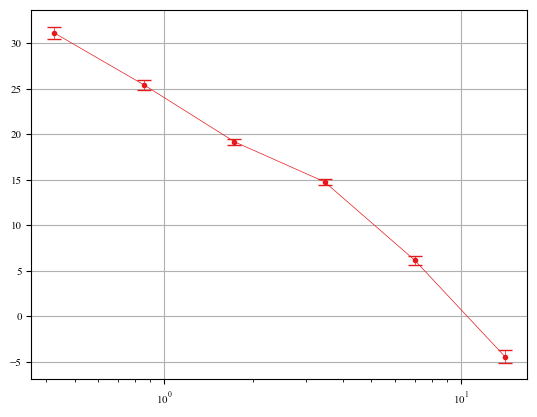

In [37]:
sqrtNz = np.sqrt(len(wdd_z))
plt.errorbar(r,np.mean(r*wdd_z[:],axis=0), yerr=np.std(r*wdd_z,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'$w_{\delta\delta}\,(r)$', marker='o',markersize=3)
# for i in range(10):
#     plt.plot(r,r*wdd_z[i], linewidth=0.5)

plt.xscale('log')
plt.grid()

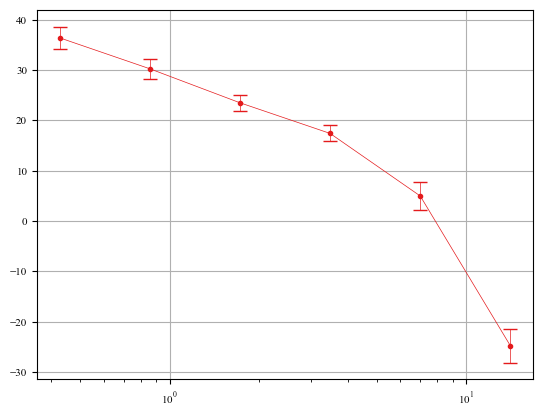

In [49]:
sqrtNz = np.sqrt(len(wdd_z2))
plt.errorbar(r,np.mean(r*wdd_z2[:],axis=0), yerr=np.std(r*wdd_z2,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'$w_{\delta\delta}\,(r)$', marker='o',markersize=3)

# for i in range(10):
#     plt.plot(r,r*wdd_z2[i], linewidth=0.5)

plt.xscale('log')
plt.grid()

In [84]:
wdp_z = np.array(wdp_z); wdx_z = np.array(wdx_z)
wdp_z_spi = np.array(wdp_z_spi); wdx_z_spi = np.array(wdx_z_spi)
wdp_z_ell = np.array(wdp_z_ell); wdx_z_ell = np.array(wdx_z_ell)

wdp_x = np.array(wdp_x); wdx_x = np.array(wdx_x)
wdp_x_spi = np.array(wdp_x_spi); wdx_x_spi = np.array(wdx_x_spi)
wdp_x_ell = np.array(wdp_x_ell); wdx_x_ell = np.array(wdx_x_ell)

wdp_y = np.array(wdp_y); wdx_y = np.array(wdx_y)
wdp_y_spi = np.array(wdp_y_spi); wdx_y_spi = np.array(wdx_y_spi)
wdp_y_ell = np.array(wdp_y_ell); wdx_y_ell = np.array(wdx_y_ell)

wdp = np.append(wdp_x, np.append(wdp_y, wdp_z,axis=0), axis=0)
wdp_spi = np.append(wdp_x_spi, np.append(wdp_y_spi, wdp_z_spi,axis=0), axis=0)
wdp_ell = np.append(wdp_x_ell, np.append(wdp_y_ell, wdp_z_ell,axis=0), axis=0)
wdx = np.append(wdx_x, np.append(wdx_y, wdx_z,axis=0), axis=0)
wdx_spi = np.append(wdx_x_spi, np.append(wdx_y_spi, wdx_z_spi,axis=0), axis=0)
wdx_ell = np.append(wdx_x_ell, np.append(wdx_y_ell, wdx_z_ell,axis=0), axis=0)

wdd = np.append(wdd_x, np.append(wdd_y, wdd_z,axis=0), axis=0)

In [85]:
print(wdd.shape)
print(wdp_ell.shape, wdp_spi.shape)
print(wdx_ell.shape, wdx_spi.shape)

np.savez("../wdplus_data.npz", r=r, x=wdp_x, y=wdp_y, z=wdp_z)
np.savez("../wdcross_data.npz", r=r, x=wdx_x, y=wdx_y, z=wdx_z)
      
np.savez("../wdplus_ell_data.npz", r=r, x=wdp_x_ell, y=wdp_y_ell, z=wdp_z_ell)
np.savez("../wdcross_ell_data.npz", r=r, x=wdx_x_ell, y=wdx_y_ell, z=wdx_z_ell)

np.savez("../wdplus_spi_data.npz", r=r, x=wdp_x_spi, y=wdp_y_spi, z=wdp_z_spi)
np.savez("../wdcross_spi_data.npz", r=r, x=wdx_x_spi, y=wdx_y_spi, z=wdx_z_spi)

np.savez("../wdd_data.npz", r=r, x=wdd_x, y=wdd_y, z=wdd_z)


(3000, 6)
(3000, 6) (3000, 6)
(3000, 6) (3000, 6)


In [17]:
print(np.mean(wdp_ell,axis=0))

[6.04067659 2.30264804 0.58236104 0.2070585  0.09957236 0.04098587]


In [50]:
print(np.mean(wdp_ell,axis=0))

[6.94872409 2.75478881 0.71536335 0.24193922 0.11513265 0.04957056
 0.01411698]


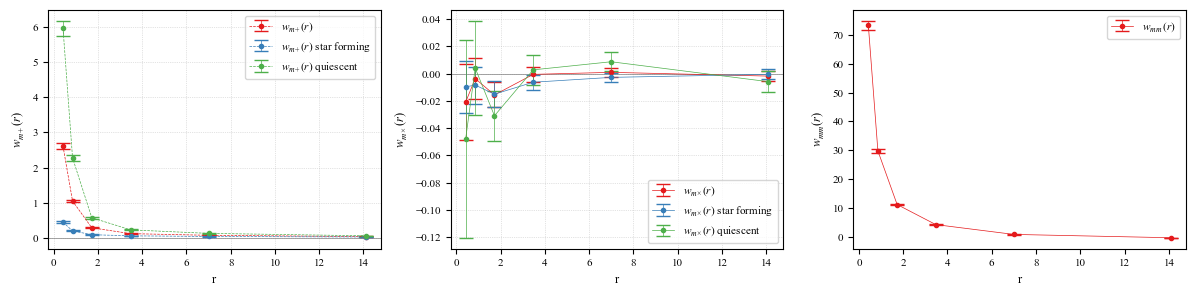

In [22]:
sqrtNx = np.sqrt(wdp_x_ell.shape[0])

fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(12,3))
ax[0].axhline(0,c='0.5',linewidth=0.5)
ax[1].axhline(0,c='0.5',linewidth=0.5)
ax[0].errorbar(r,np.mean(wdp_x,axis=0), yerr=np.std(wdp_x,axis=0)/sqrtNx, linewidth=0.5, linestyle='--', elinewidth=0.5
               , capsize=5 ,label=r'$w_{m {+}}\,(r)$', marker='o',markersize=3)
ax[0].errorbar(r,np.mean(wdp_x_spi,axis=0), yerr=np.std(wdp_x_spi,axis=0)/sqrtNx, linewidth=0.5, linestyle='--', elinewidth=0.5
               , capsize=5 ,label=r'$w_{m {+}}\,(r)$ star forming', marker='o',markersize=3)
ax[0].errorbar(r,np.mean(wdp_x_ell,axis=0), yerr=np.std(wdp_x_ell,axis=0)/sqrtNx, linewidth=0.5, linestyle='--', elinewidth=0.5
               , capsize=5 ,label=r'$w_{m {+}}\,(r)$ quiescent', marker='o',markersize=3)
ax[0].set_xlabel("r")
ax[0].set_ylabel(r"$w_{m+}(r)$")
ax[0].legend()


ax[1].errorbar(r,np.mean(wdx_x,axis=0), yerr=np.std(wdx,axis=0)/sqrtNx, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'$w_{m {\times}}\,(r)$', marker='o',markersize=3)
ax[1].errorbar(r,np.mean(wdx_x_spi,axis=0), yerr=np.std(wdx_spi,axis=0)/sqrtNx, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'$w_{m {\times}}\,(r)$ star forming', marker='o',markersize=3)
ax[1].errorbar(r,np.mean(wdx_x_ell,axis=0), yerr=np.std(wdx_ell,axis=0)/sqrtNx, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'$w_{m {\times}}\,(r)$ quiescent', marker='o',markersize=3)
ax[1].set_xlabel("r")
ax[1].set_ylabel(r"$w_{m\times}(r)$")
ax[1].legend()


ax[2].errorbar(r,np.mean(wdd_x,axis=0), yerr=np.std(wdd_x,axis=0)/sqrtNx, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'$w_{mm}\,(r)$', marker='o',markersize=3)
ax[2].set_xlabel("r")
ax[2].set_ylabel(r"$w_{mm}(r)$")
ax[2].legend()

ax[0].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7) ; ax[1].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)
fig.tight_layout()

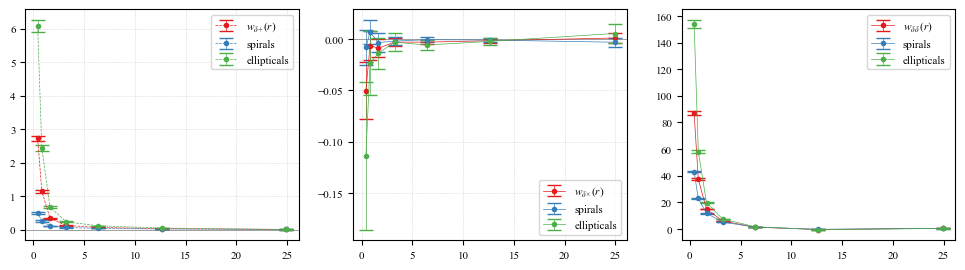

In [13]:
sqrtNy = np.sqrt(wdp_y_ell.shape[0])

fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(12,3))
ax[0].axhline(0,c='0.5',linewidth=0.5)
ax[1].axhline(0,c='0.5',linewidth=0.5)
ax[0].errorbar(r,np.mean(wdp_y,axis=0), yerr=np.std(wdp_y,axis=0)/sqrtNy, linewidth=0.5, linestyle='--', elinewidth=0.5
               , capsize=5 ,label=r'$w_{\delta{+}}\,(r)$', marker='o',markersize=3)
ax[0].errorbar(r,np.mean(wdp_y_spi,axis=0), yerr=np.std(wdp_y_spi,axis=0)/sqrtNy, linewidth=0.5, linestyle='--', elinewidth=0.5
               , capsize=5 ,label=r'spirals', marker='o',markersize=3)
ax[0].errorbar(r,np.mean(wdp_y_ell,axis=0), yerr=np.std(wdp_y_ell,axis=0)/sqrtNy, linewidth=0.5, linestyle='--', elinewidth=0.5
               , capsize=5 ,label=r'ellipticals', marker='o',markersize=3)
ax[0].legend()


ax[1].errorbar(r,np.mean(wdx_y,axis=0), yerr=np.std(wdx_y,axis=0)/sqrtNy, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'$w_{\delta {\times}}\,(r)$', marker='o',markersize=3)
ax[1].errorbar(r,np.mean(wdx_y_spi,axis=0), yerr=np.std(wdx_y_spi,axis=0)/sqrtNy, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'spirals', marker='o',markersize=3)
ax[1].errorbar(r,np.mean(wdx_y_ell,axis=0), yerr=np.std(wdx_y_ell,axis=0)/sqrtNy, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'ellipticals', marker='o',markersize=3)
ax[1].legend()


ax[2].errorbar(r,np.mean(wdd_y,axis=0), yerr=np.std(wdd_y,axis=0)/sqrtNy, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'$w_{\delta\delta}\,(r)$', marker='o',markersize=3)
ax[2].errorbar(r,np.mean(wdd_y_spi,axis=0), yerr=np.std(wdd_y_spi,axis=0)/sqrtNy, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'spirals', marker='o',markersize=3)
ax[2].errorbar(r,np.mean(wdd_y_ell,axis=0), yerr=np.std(wdd_y_ell,axis=0)/sqrtNy, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'ellipticals', marker='o',markersize=3)
ax[2].legend()

ax[0].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7) ; ax[1].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)

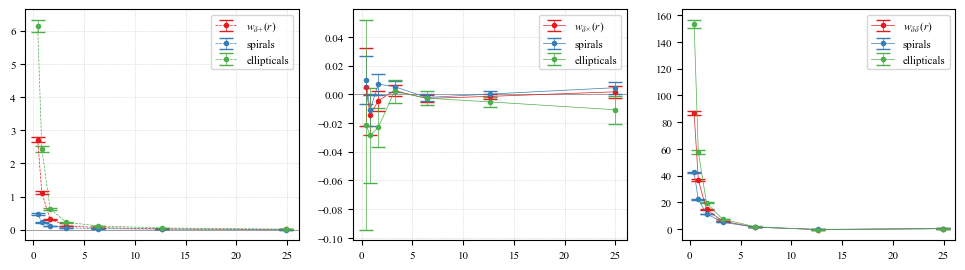

In [14]:
sqrtNz = np.sqrt(wdp_z_ell.shape[0])

fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(12,3))
ax[0].axhline(0,c='0.5',linewidth=0.5)
ax[1].axhline(0,c='0.5',linewidth=0.5)
ax[0].errorbar(r,np.mean(wdp_z,axis=0), yerr=np.std(wdp_z,axis=0)/sqrtNz, linewidth=0.5, linestyle='--', elinewidth=0.5
               , capsize=5 ,label=r'$w_{\delta{+}}\,(r)$', marker='o',markersize=3)
ax[0].errorbar(r,np.mean(wdp_z_spi,axis=0), yerr=np.std(wdp_z_spi,axis=0)/sqrtNz, linewidth=0.5, linestyle='--', elinewidth=0.5
               , capsize=5 ,label=r'spirals', marker='o',markersize=3)
ax[0].errorbar(r,np.mean(wdp_z_ell,axis=0), yerr=np.std(wdp_z_ell,axis=0)/sqrtNz, linewidth=0.5, linestyle='--', elinewidth=0.5
               , capsize=5 ,label=r'ellipticals', marker='o',markersize=3)
ax[0].legend()


ax[1].errorbar(r,np.mean(wdx_z,axis=0), yerr=np.std(wdx_z,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'$w_{\delta {\times}}\,(r)$', marker='o',markersize=3)
ax[1].errorbar(r,np.mean(wdx_z_spi,axis=0), yerr=np.std(wdx_z_spi,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'spirals', marker='o',markersize=3)
ax[1].errorbar(r,np.mean(wdx_z_ell,axis=0), yerr=np.std(wdx_z_ell,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'ellipticals', marker='o',markersize=3)
ax[1].legend()


ax[2].errorbar(r,np.mean(wdd_z,axis=0), yerr=np.std(wdd_z,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'$w_{\delta\delta}\,(r)$', marker='o',markersize=3)
ax[2].errorbar(r,np.mean(wdd_z_spi,axis=0), yerr=np.std(wdd_z_spi,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'spirals', marker='o',markersize=3)
ax[2].errorbar(r,np.mean(wdd_z_ell,axis=0), yerr=np.std(wdd_z_ell,axis=0)/sqrtNz, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'ellipticals', marker='o',markersize=3)
ax[2].legend()

ax[0].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7) ; ax[1].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)

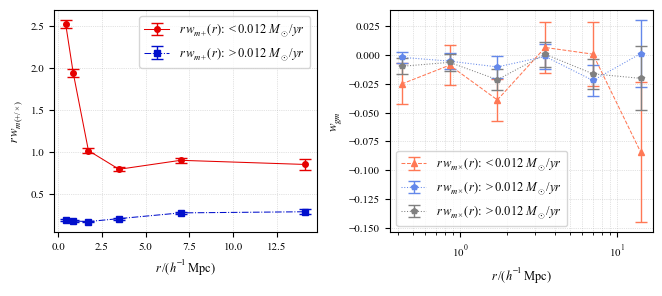

In [128]:
sqrtN = np.sqrt(wdp_spi.shape[0])
r_wdp_spi = wdp_spi*r
r_wdp_ell = wdp_ell*r
r_wdx_spi = wdx_spi*r
r_wdx_ell = wdx_ell*r
# r_wdd_z_spi = wdd_z_spi*r
# r_wdd_z_ell = wdd_z_ell*r

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20/3, 3))  # Width-to-height ratio adjusted for a clean layout
# ax[0].axhline(0, c='0.5', linewidth=1, linestyle='--')
ax[0].errorbar(
    r, np.mean(r_wdp_ell, axis=0), yerr=np.std(r_wdp_ell, axis=0) / sqrtN,
    linewidth=0.75, linestyle='-', elinewidth=1, capsize=4, color='xkcd:red',
    label=r'$r\,w_{m{+}}\,(r)$: $<0.012$ $M_\odot /yr$', marker='o', markersize=4
)
ax[1].errorbar(
    r, np.mean(r_wdx_ell, axis=0), yerr=np.std(r_wdx_ell, axis=0) / sqrtN,
    linewidth=0.75, linestyle='--', elinewidth=1, capsize=4,color='xkcd:melon',alpha=1.0,
    label=r'$r\,w_{m{\times}}\,(r)$: $<0.012$ $M_\odot /yr$', marker='^', markersize=4
)
ax[0].errorbar(
    r, np.mean(r_wdp_spi, axis=0), yerr=np.std(r_wdp_spi, axis=0) / sqrtN,
    linewidth=0.75, linestyle='-.', elinewidth=1, capsize=4, color='xkcd:true blue',
    label=r'$r\,w_{m{+}}\,(r)$: $>0.012$ $M_\odot /yr$', marker='s', markersize=4
)
ax[1].errorbar(
    r, np.mean(r_wdx_spi, axis=0), yerr=np.std(r_wdx_spi, axis=0) / sqrtN,
    linewidth=0.75, linestyle=':', elinewidth=1, capsize=4, color='xkcd:soft blue',
    label=r'$r\,w_{m{\times}}\,(r)$: $>0.012$ $M_\odot /yr$', marker='p', markersize=4
)
ax[1].errorbar(
    r, np.mean(r_wdx, axis=0), yerr=np.std(r_wdx, axis=0) / sqrtN,
    linewidth=0.75, linestyle=':', elinewidth=1, capsize=4, color='0.5',
    label=r'$r\,w_{m{\times}}\,(r)$: $>0.012$ $M_\odot /yr$', marker='p', markersize=4
)

# Plot the data for wdd
# ax[1].axhline(0, c='0.5', linewidth=1, linestyle='--')
# ax[1].errorbar(
#     r, np.mean(wdd_ell, axis=0), yerr=np.std(wdd_ell, axis=0) / sqrtN,
#     linewidth=0.75, elinewidth=1, capsize=4, color='xkcd:medium green',
#     label=r'$w_{mm}\,(r)$: $<0.012$ $M_\odot /yr$', marker='<', markersize=4
# )
# ax[1].errorbar(
#     r, np.mean(wdd_spi, axis=0), yerr=np.std(wdd_spi, axis=0) / sqrtN,
#     linewidth=0.75, linestyle='-.',elinewidth=1, capsize=4, color='xkcd:light green',
#     label=r'$w_{mm}\,(r)$: $>0.012$ $M_\odot /yr$', marker='>', markersize=4
# )


# Grid and scaling
for axis in ax:
    axis.grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)
#     axis.set_xscale('log')  # Example for log scale x-axis
#     axis.set_yscale('log')  # Example for log scale y-axis
#     axis.set_xlim(np.min(r) * 0.8, np.max(r) * 1.2)

# Adjust y-limits to be symmetric
# ax[0].set_ylim(
#     -0.1 * np.abs(ax[0].get_ylim()).max(), np.abs(ax[0].get_ylim()).max()
# )
# ax[0].set_xlim(0,30)
# ax[1].set_ylim(
#     -0.1 * np.abs(ax[1].get_ylim()).max(), np.abs(ax[1].get_ylim()).max()
# )
# ax[1].set_xlim(0,30)

# Axis labels and titles
ax[0].set_xlabel(r"$r \, /(h^{-1} \, \mathrm{Mpc})$",fontsize=9)
ax[0].set_ylabel(r"$r\,w_{m(+/\times)}$",fontsize=9)
ax[0].legend(fontsize=9)
ax[1].set_xscale('log')
ax[1].set_xlabel(r"$r \, /(h^{-1} \, \mathrm{Mpc})$",fontsize=9)
ax[1].set_ylabel(r"$w_{g m}$",fontsize=9)
ax[1].legend(fontsize=9)

# Adjust layout and save
fig.tight_layout()

In [63]:
d = np.load("../wdd_data.npz")
wdd = np.array(d['wgg'])

In [135]:
# Suppose:
#   r_edges = array of rp-bin edges (length N+1)
r_edges = np.array([0.3, 0.60409612, 1.2164404, 2.44948974, 4.93242415, 9.93219427, 20.])
#   w_hat   = array of projected wgg in each bin (length N)
w_hat = np.mean(wdd, axis=0)
# w_hat = np.array([73.24153965, 29.7459154,  11.20085179,  4.2499753,   0.8430501,  -0.32792501])
r_centers = 0.5*(r_edges[:-1] + r_edges[1:])
dr        = r_edges[1:] - r_edges[:-1]

# analytic RR weights (up to a common factor):
rr = r_centers * dr

# compute C:
C = - np.sum(rr * w_hat) / np.sum(rr)

# corrected wgg:
w_corr = w_hat + C
w_corr2 = w_hat - C
print(C, wdd.shape)

-0.3642305800071328 (3000, 6)


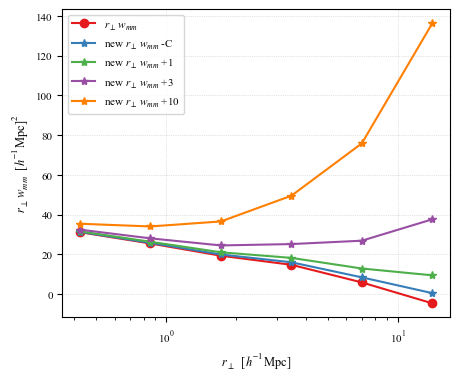

In [134]:
plt.figure(figsize=(5, 4))
plt.plot(r,r*w_hat,marker='o', label=r'$r_\perp\, w_{mm}$')
# plt.plot(r,r*w_corr,marker='*', label=r'new $r_\perp\, w_{mm}$ +C')
plt.plot(r,r*w_corr2,marker='*', label=r'new $r_\perp\, w_{mm}$ -C')
plt.grid(which='major', linestyle='dotted', linewidth=0.5, alpha=0.7)
plt.plot(r,r*(w_hat+1),marker='*', label=r'new $r_\perp\, w_{mm}$ +1')
plt.plot(r,r*(w_hat+3),marker='*', label=r'new $r_\perp\, w_{mm}$ +3')
plt.plot(r,r*(w_hat+10),marker='*', label=r'new $r_\perp\, w_{mm}$ +10')
plt.xscale('log')
plt.xlabel(r"$r_\perp \,\,\,\, [h^{-1} \, \mathrm{Mpc}]$",fontsize=9)
plt.ylabel(r"$r_\perp\,w_{m m}\,\,\,\,[h^{-1} \, \mathrm{Mpc}]^2$",fontsize=9)
plt.legend()
plt.savefig(
    '/Users/danie/Downloads/wmm constants.png',
    dpi=300, bbox_inches='tight'
)

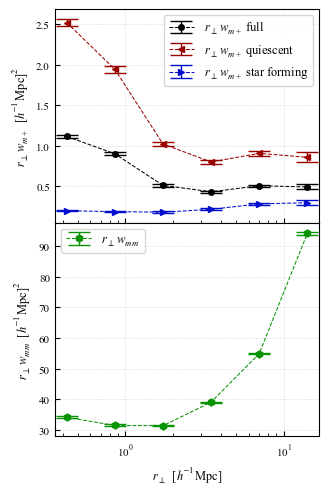

In [154]:
sqrtN = np.sqrt(3000)
r_wdp = wdp[:,:]*r
r_wdp_spi = wdp_spi[:,:]*r
r_wdp_ell = wdp_ell[:,:]*r
r_wdd = (wdd[:,:]+7)*r
# r_wdd_z_spi = wdd_z_spi*r
# r_wdd_z_ell = wdd_z_ell*r

fig = plt.figure(figsize=(10/3, 5))  # Adjust the figure size as needed
gs = fig.add_gridspec(2, 1, height_ratios=[1, 1], hspace=0.0)  # Reduce vertical space

# Upper plot: Original data
ax = fig.add_subplot(gs[0])
ax.errorbar(
    r, np.mean(r_wdp, axis=0), yerr=np.std(r_wdp, axis=0) / sqrtN,
    linewidth=0.75, linestyle='--', elinewidth=1, capsize=8, color='k',
    label=r'$r_\perp\, w_{m+}$ full', marker='o', markersize=4,alpha=1
)
ax.errorbar(
    r, np.mean(r_wdp_ell, axis=0), yerr=np.std(r_wdp_ell, axis=0) / sqrtN,
    linewidth=0.75, linestyle='--', elinewidth=1, capsize=8, color='xkcd:deep red',
    label=r'$r_\perp\, w_{m+}$ quiescent', marker='<', markersize=5,alpha=1
)
ax.errorbar(
    r, np.mean(r_wdp_spi, axis=0), yerr=np.std(r_wdp_spi, axis=0) / sqrtN,
    linewidth=0.75, linestyle='--', elinewidth=1, capsize=8, color='xkcd:true blue',
    label=r'$r_\perp\, w_{m+}$ star forming', marker='>', markersize=5,alpha=1
)

ax.tick_params(direction='in',axis='both', which='both')
ax.grid(which='major', linestyle='dotted', linewidth=0.5, alpha=0.7)
ax.set_xscale('log')
# ax.set_yscale('log')

# Axis labels and titles
ax.set_xlabel(r"$r_\perp \,\,\,\, [h^{-1} \, \mathrm{Mpc}]$",fontsize=9)
ax.set_ylabel(r"$r_\perp\,w_{m+}\,\,\,\,[h^{-1} \, \mathrm{Mpc}]^2$",fontsize=9)
ax.legend(fontsize=9)

ax2 = fig.add_subplot(gs[1])
ax2.errorbar(
    r, np.mean(r_wdd, axis=0), yerr=np.std(r_wdd, axis=0) / sqrtN,
    linewidth=0.75, linestyle='--', elinewidth=1, capsize=8, color='xkcd:true green',
    label=r'$r_\perp\, w_{mm}$ ', marker='h', markersize=5,alpha=1
)
ax2.set_xscale('log')
# ax2.set_yscale('log')
ax2.set_xlabel(r"$r_\perp \,\,\,\, [h^{-1} \, \mathrm{Mpc}]$",fontsize=9)
ax2.set_ylabel(r"$r_\perp\,w_{m m}\,\,\,\,[h^{-1} \, \mathrm{Mpc}]^2$",fontsize=9)
ax2.legend(fontsize=9, loc='best')#, bbox_to_anchor=(1.02, 1))
ax2.tick_params(direction='in',axis='both', which='both')
ax2.grid(which='major', linestyle='dotted', linewidth=0.5, alpha=0.7)
# Adjust layout and save
fig.tight_layout()
plt.savefig(
    '/Users/danie/Library/CloudStorage/OneDrive-Personal/Physics UCL/Year 3/Astro Research Project 2023/SFR corrs.pdf',
    dpi=300, bbox_inches='tight'
)

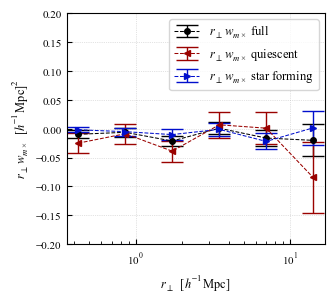

In [68]:
sqrtN = np.sqrt(3000)

fig = plt.figure(figsize=(10/3, 3))
r_wdx = wdx[:,:]*r
r_wdx_spi = wdx_spi[:,:]*r
r_wdx_ell = wdx_ell[:,:]*r

ax1 = fig.add_subplot()
ax1.errorbar(
    r, np.mean(r_wdx, axis=0), yerr=np.std(r_wdx, axis=0) / sqrtN,
    linewidth=0.75, color='k', linestyle='--', elinewidth=1, capsize=8,alpha=1.0,
    label=r'$r_\perp\, w_{m\times}$ full', marker='o', markersize=4
)
ax1.errorbar(
    r, np.mean(r_wdx_ell, axis=0), yerr=np.std(r_wdx_ell, axis=0) / sqrtN,
    linewidth=0.75, color='xkcd:deep red', linestyle='--', elinewidth=1, capsize=8,alpha=1.0,
    label=r'$r_\perp\, w_{m\times}$ quiescent', marker='<', markersize=4
)
ax1.errorbar(
    r, np.mean(r_wdx_spi, axis=0), yerr=np.std(r_wdx_spi, axis=0) / sqrtN,
    linewidth=0.75, color='xkcd:true blue', linestyle='--', elinewidth=1, capsize=8,alpha=1.0,
    label=r'$r_\perp\, w_{m\times}$ star forming', marker='>', markersize=4
)
ax1.tick_params(direction='in',axis='both', which='both')
ax1.grid(which='major', linestyle='dotted', linewidth=0.5, alpha=0.7)
ax1.set_xscale('log')
ax1.set_xlabel(r"$r_\perp \,\,\,\, [h^{-1} \, \mathrm{Mpc}]$",fontsize=9)
ax1.set_ylabel(r"$r_\perp\,w_{m\times}\,\,\,\,[h^{-1} \, \mathrm{Mpc}]^2$",fontsize=9)
ax1.legend(fontsize=9)
ax1.set_ylim([-.2,.2])
plt.savefig(
    '/Users/danie/Library/CloudStorage/OneDrive-Personal/Physics UCL/Year 3/Astro Research Project 2023/wdx corrs.pdf',
    dpi=300, bbox_inches='tight'
)